## Soal : 
3. Bandingkan performa dari setidaknya 5 classification model yang pernah dipelajari di kelas.
4. Sertakan visualisasi data yang menggambarkan perbandingan performa dari kelima model.

# Breast Cancer Dataset

## Load Breast Cancer Dataset

In [24]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (569, 30)
Class: {0, 1}


### Training Set & Testing Set

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 1. Support Vector Machine

In [26]:
from sklearn.svm import SVC

svm = SVC(probability = True, kernel = 'linear')

svm.fit(X_test, y_test)

print(f'Performance : {svm.score(X_test, y_test)}')

Performance : 0.9883040935672515


## 2. KNN (K Nearest Neighbour)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train, y_train)

print(f'Performance : {knn.score(X_test, y_test)}')

Performance : 0.9005847953216374


## 3. Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

print(f' Performance : {nb.score(X_test, y_test)}')

 Performance : 0.9239766081871345


## 4. Random Forest

In [29]:
from sklearn import ensemble

forest = ensemble.RandomForestClassifier(n_estimators = 50,
                                        random_state = 0)

forest.fit(X_train, y_train)

print(f'Performance : {forest.score(X_train, y_train)}')

Performance : 0.9974874371859297


## 5. Decision Tree

In [30]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(max_depth=6)

tree.fit(X_train, y_train)

tree.score(X_test, y_test)

y_pred = tree.predict(X_test)
print(f'Performance : {tree.score(X_test, y_test)}')

Performance : 0.9298245614035088


# Receiver Operating Characteristic

## Prediction Probabilities

In [31]:
svm_prob = svm.predict_proba(X_test) # SVM Prediction
knn_prob = knn.predict_proba(X_test) # KNN Prediction
nb_prob = nb.predict_proba(X_test) # Naive Bayes Prediction
forest_prob = forest.predict_proba(X_test) # Random Forest Prediction
tree_prob = tree.predict_proba(X_test) # Desicion Tree Prediction

## Probabilities Positive Outcome

In [50]:
svm = svm_prob[:, 1]
knn = knn_prob[:, 1]
nb = nb_prob[:, 1]
forest = forest_prob[:, 1]
tree = tree_prob[:, 1]

## Compute AUROC Values

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

svm_auc = roc_auc_score(y_test, svm)
knn_auc = roc_auc_score(y_test, knn)
nb_auc = roc_auc_score(y_test, nb)
forest_auc = roc_auc_score(y_test, forest)
tree_auc = roc_auc_score(y_test, tree)

## Display AUROC Values

In [34]:
print(F'Support Vector Machine (SVM) AUROC Value = {svm_auc}')
print(F'Key Nearest Neighbors (KNN) AUROC Value = {knn_auc}')
print(F'Naive Bayes AUROC Value = {nb_auc}')
print(F'Random Forest AUROC Value = {forest_auc}')
print(F'Desicion Tree AUROC Value = {tree_auc}')

Support Vector Machine (SVM) AUROC Value = 0.997501469723692
Key Nearest Neighbors (KNN) AUROC Value = 0.9534097589653144
Naive Bayes AUROC Value = 0.9854497354497355
Random Forest AUROC Value = 0.9963256907701352
Desicion Tree AUROC Value = 0.9406966490299822


## Calculate ROC Curve

In [44]:
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb)
forest_fpr, forest_tpr, _ = roc_curve(y_test, forest)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree)

# Data Visualisasi

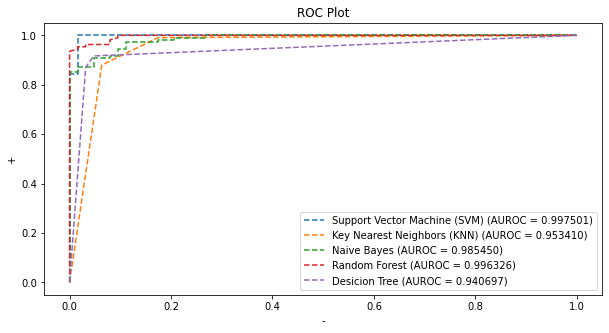

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 5))

plt.plot(svm_fpr, svm_tpr, linestyle = '--', label = 'Support Vector Machine (SVM) (AUROC = %0.6f)' %svm_auc)
plt.plot(knn_fpr, knn_tpr, linestyle = '--', label = 'Key Nearest Neighbors (KNN) (AUROC = %0.6f)' %knn_auc)
plt.plot(nb_fpr, nb_tpr, linestyle = '--', label = 'Naive Bayes (AUROC = %0.6f)' %nb_auc)
plt.plot(forest_fpr, forest_tpr, linestyle = '--', label = 'Random Forest (AUROC = %0.6f)' %forest_auc)
plt.plot(tree_fpr, tree_tpr, linestyle = '--', label = 'Desicion Tree (AUROC = %0.6f)' %tree_auc)


# Title

plt.title('ROC Plot')

# Axis label

plt.xlabel('-')
plt.ylabel('+')

# Show Legend

plt.legend()
plt.show()